In [1]:

from matplotlib import pyplot as plt
import os
import numpy as np
import glob
import os

## astropy
import astropy.units as u
from astropy.table import Table

## calin
from cta.nectarcam.feb.I_NmcConfig import NmcConfig

## ctapipe
from ctapipe_io_nectarcam import NectarCAMEventSource 
from ctapipe.io import event_source, EventSeeker

import scipy.stats as scsp
from scipy.stats import poisson                                                                                                             

from fit_ses_v6 import *
#import seaborn as sns



/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/corsikaio/subblocks/dtypes.py:20: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dict(**dt))


In [2]:
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
npix = 10
nloop = 30
ress_MC    = []
ress_data  = []
gains_MC   = []
gains_data = []

sim_gains   = []

#MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_08pe_newWF.simtel.gz'
MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_08pe_WF1010_noise36_TTled.simtel.gz'

#data_file_path = '/media/ttaverni/Transcend/data/speR1/NectarCAM.Run1043.000[0-9].fits.fz'
data_file_path = "/media/ttaverni/Transcend/data/speR1/NectarCAM.Run1482.0000.fits.fz"
        

        
for jj in range(nloop):
    wfs_MC   = []
    wfs_data = []
    pixs = np.arange(jj*npix,(jj+1)*npix,1)
    inputfile_reader_MC = event_source(
            input_url = MC_file_path,
            max_events=10000)

    all_wfs = []
    for ii, event in enumerate(inputfile_reader_MC):
            all_wfs.append(event.r0.tel[1].waveform[0,pixs])
    wfs_MC = np.array(all_wfs)
    
    dc_to_pe = event.mc.tel[1].dc_to_pe[1,pixs]
    Simgains    = 16.2/dc_to_pe
    
    inputfile_reader = NectarCAMEventSource(
            input_url = data_file_path,
            max_events=10000)
    cfg = inputfile_reader.camera_config
    pix_ids = cfg.expected_pixels_id[pixs]    
    all_wfs = []
    for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[event.r0.tels_with_data[0]].waveform[1,pix_ids])
    wfs_data = np.array(all_wfs)
        
    for pix_index in range(npix):
        wfs = wfs_MC[:,pix_index]
        Smax = wfs.mean(axis=0).argmax()
        Q_array1_MC = wfs[:,Smax-6:Smax+10].sum(axis=1)
        try:
            res_MC,err,gain_MC = fit_ses_2g(Q_array1_MC,plot=False)
        except:
            continue
    
        wfs = wfs_data[:,pix_index]
        Smax = wfs.mean(axis=0).argmax()
        Q_array1_data = wfs[:,Smax-6:Smax+10].sum(axis=1)
        try:
            res_data,err,gain_data = fit_ses_2g(Q_array1_data,plot=False)
        except:
            continue
        if gain_data<50 or res_MC[0]<.6:
            continue
        
        ress_MC.append(res_MC)
        ress_data.append(res_data)
        gains_MC.append(gain_MC)
        gains_data.append(gain_data)
        sim_gains.append(Simgains[pix_index])
    



=== Gain ::  58.28999119096608 p.e. ------------- ==== Light I 0.800860424952832
=== Gain ::  58.21389926460019 p.e. ------------- ==== Light I 0.6611341006923607
=== Gain ::  48.554988178665376 p.e. ------------- ==== Light I 1.0250320554723886
=== Gain ::  58.926448201193 p.e. ------------- ==== Light I 0.679119897999767
=== Gain ::  49.57329615765767 p.e. ------------- ==== Light I 0.9043350723417067
=== Gain ::  58.246294033581464 p.e. ------------- ==== Light I 0.6484192428060233
=== Gain ::  61.57119553319851 p.e. ------------- ==== Light I 0.7808539350196141
=== Gain ::  60.09275080785001 p.e. ------------- ==== Light I 0.6283650048994053
=== Gain ::  58.015491843069775 p.e. ------------- ==== Light I 0.8935150989155227
=== Gain ::  58.4728648611465 p.e. ------------- ==== Light I 0.6211472126801971
=== Gain ::  60.69926884882593 p.e. ------------- ==== Light I 0.8198217053558102
=== Gain ::  58.669599506859456 p.e. ------------- ==== Light I 0.6434266462401431
=== Gain ::  57.0

=== Gain ::  52.409459950943514 p.e. ------------- ==== Light I 0.8818079235380633
=== Gain ::  55.18249681061307 p.e. ------------- ==== Light I 0.6383929119437627
=== Gain ::  59.55492633324291 p.e. ------------- ==== Light I 0.8336656815337461
=== Gain ::  59.25910562256142 p.e. ------------- ==== Light I 0.6639461502592153
=== Gain ::  49.831237971248434 p.e. ------------- ==== Light I 1.1090995771637862
=== Gain ::  57.9154143731351 p.e. ------------- ==== Light I 0.6627278073954211
=== Gain ::  58.60243412401935 p.e. ------------- ==== Light I 0.7620862621220705
=== Gain ::  57.46193907924584 p.e. ------------- ==== Light I 0.6168893809927576
=== Gain ::  61.16169046301015 p.e. ------------- ==== Light I 0.7852550084818513
=== Gain ::  60.900949949822724 p.e. ------------- ==== Light I 0.627037872308011
=== Gain ::  57.80320396366521 p.e. ------------- ==== Light I 0.9107768543827178
=== Gain ::  57.584536687880245 p.e. ------------- ==== Light I 0.6201431098882446
=== Gain ::  5

=== Gain ::  55.47486731817879 p.e. ------------- ==== Light I 0.8367802327672416
=== Gain ::  58.22184966563532 p.e. ------------- ==== Light I 0.654907170144
=== Gain ::  61.98413213535336 p.e. ------------- ==== Light I 0.7703534023890654
=== Gain ::  58.57304531974633 p.e. ------------- ==== Light I 0.597922119386859
=== Gain ::  53.321776855348375 p.e. ------------- ==== Light I 0.9060061204802856
=== Gain ::  57.74878835521015 p.e. ------------- ==== Light I 0.6229011503756552
=== Gain ::  63.26602245901864 p.e. ------------- ==== Light I 0.8240038276174414
=== Gain ::  58.92803800425493 p.e. ------------- ==== Light I 0.5509049391125118
=== Gain ::  59.99602927995392 p.e. ------------- ==== Light I 0.8593349857127093
=== Gain ::  59.05138138360552 p.e. ------------- ==== Light I 0.6723098627902985
=== Gain ::  52.416819821915766 p.e. ------------- ==== Light I 0.9956904664992005
=== Gain ::  58.5721107971935 p.e. ------------- ==== Light I 0.6628753714563992
=== Gain ::  59.0727

=== Gain ::  65.43476144205223 p.e. ------------- ==== Light I 0.7445759953535367
=== Gain ::  58.54505399206128 p.e. ------------- ==== Light I 0.6456898655912467
=== Gain ::  66.6309587264895 p.e. ------------- ==== Light I 0.8015756949708156
=== Gain ::  58.39476228358437 p.e. ------------- ==== Light I 0.6268092912187682
=== Gain ::  58.19482868366604 p.e. ------------- ==== Light I 0.7888039489973921
=== Gain ::  59.64898080858965 p.e. ------------- ==== Light I 0.6401275222270238
=== Gain ::  62.08311028356289 p.e. ------------- ==== Light I 0.7929570641281685
=== Gain ::  56.93018239380258 p.e. ------------- ==== Light I 0.6493391928443758
=== Gain ::  54.91755930881239 p.e. ------------- ==== Light I 0.8102888519892631
=== Gain ::  57.34588428833374 p.e. ------------- ==== Light I 0.6799494786014657
=== Gain ::  57.1153712625161 p.e. ------------- ==== Light I 0.7554755437202346
=== Gain ::  58.82218221108194 p.e. ------------- ==== Light I 0.6654696234014492
=== Gain ::  53.75

=== Gain ::  52.545315786681016 p.e. ------------- ==== Light I 0.8871747957523127
=== Gain ::  57.65775434990283 p.e. ------------- ==== Light I 0.5978860025989147
=== Gain ::  60.64554516384931 p.e. ------------- ==== Light I 0.754902167356371
=== Gain ::  57.833585825421345 p.e. ------------- ==== Light I 0.614134351297252
=== Gain ::  65.27991095305642 p.e. ------------- ==== Light I 0.7337641685529471
=== Gain ::  55.42467911588856 p.e. ------------- ==== Light I 0.6708139204437678
=== Gain ::  58.33588205601367 p.e. ------------- ==== Light I 0.8438944574975046
=== Gain ::  58.73617105268972 p.e. ------------- ==== Light I 0.5968165004997164
=== Gain ::  53.685253753962435 p.e. ------------- ==== Light I 0.8732824461648275
=== Gain ::  58.5590907028353 p.e. ------------- ==== Light I 0.6538637709691816
=== Gain ::  51.83287026365077 p.e. ------------- ==== Light I 0.8684984003304267
=== Gain ::  56.66451398087701 p.e. ------------- ==== Light I 0.6313184726490169
=== Gain ::  54.

=== Gain ::  53.25192311151061 p.e. ------------- ==== Light I 0.9228585538927205
=== Gain ::  56.575386768718005 p.e. ------------- ==== Light I 0.6453193843450921
=== Gain ::  53.19761596518647 p.e. ------------- ==== Light I 0.8876974137460275
=== Gain ::  59.67863218343084 p.e. ------------- ==== Light I 0.6674130290043814
=== Gain ::  48.44604858386802 p.e. ------------- ==== Light I 0.954049465690022
=== Gain ::  55.50988012971153 p.e. ------------- ==== Light I 0.708982838754952
=== Gain ::  61.82139298078499 p.e. ------------- ==== Light I 0.8195444788226178
=== Gain ::  58.95887643641883 p.e. ------------- ==== Light I 0.6704526181276331
=== Gain ::  52.01724271775088 p.e. ------------- ==== Light I 0.9322583207172324
=== Gain ::  56.73753491334592 p.e. ------------- ==== Light I 0.6886611171822934
=== Gain ::  57.743035079659414 p.e. ------------- ==== Light I 0.8459105773053583
=== Gain ::  60.54372252415946 p.e. ------------- ==== Light I 0.6178432923758785
=== Gain ::  62.

In [4]:
def fit_ses_2g_2(Q_array,plot):
    fontsize=18
    Q_array = Q_array - 4002.4
    pp_ = 0.45
    n_ = 0.715  
    Q_min = min(Q_array)
    Q_max = max(Q_array)
    n_bin = int((Q_max-Q_min)/1)

    spemodel=doubleGaussConstrained
    fitf = mes2g
    p0=[.9,  0,15.,  .5, 65]
    #p0=[.8,  4000,15.,  .8, 150]
    ##p0=[.8,  4000. ,10.,  .5, 70]
    
    
    #~ spemodel=pdfspe
    #~ fitf = get_mes
    #~ p0=[.1,  np.median(Q_array),  10,   50, 15]
    
    if plot: 
        fig, (ax,axr) = plt.subplots(nrows=2, sharex=True,figsize=(12, 6),gridspec_kw = {'height_ratios':[4, 1]})
        fig.subplots_adjust(hspace=0)
        n,bins,patches = ax.hist(Q_array,n_bin,range=(Q_min,Q_max), density=0,linewidth=0.3,edgecolor='yellow', facecolor='orange', alpha=0.4,label='spe data')
    else:
        n,bins  = np.histogram(Q_array,bins=n_bin,range=(Q_min,Q_max))
        
    centers = (bins[:-1] + bins[1:]) / 2


    pp,pcov = curve_fit(fitf,centers,n/sum(n),p0=p0,maxfev = 6000,\
            #~ bounds=([0,3000,0,0,0],[2,6000,30,.8,400]))
            bounds=([0,-100,10,.2,10],[4.,100,70,.7,500]))
            # ~ bounds=([0,3000,10,.2,10],[4.,7000,30,.7,500]))
    ##pp =p0
    ##print("fit :: ",pp)
    xspe = np.linspace(-1000,1000,2000)
    ppped = stats.norm.pdf(np.linspace(-100,100,200),0,pp[2])
    spe = doubleGaussConstrained(xspe,pp_,pp[3],pp[4],n_)
    gain=((xspe)*spe).sum()
    print("=== Gain :: ",gain,'p.e. ------------- ==== Light I',pp[0])
    if plot:
        ax.errorbar(centers, n, yerr = np.array(n)**0.5,fmt='none', color = "orange",alpha = 0.5)
        ax.plot(centers,fitf(centers,*pp)*sum(n),color="red",label='Model,  Light I :: {:.3} p.e.'.format(pp[0]))
        ax.plot(centers,stats.norm.pdf(centers,pp[1],pp[2])*sum(n)*np.exp(-pp[0]),':',color="blue",label='pedestals : st.d. {:.2}'.format(pp[2]))
        #ax.plot(centers,spe*sum(n)*np.exp(-pp[0])*pp[0],'--',label='spe')
        npe=np.convolve(spe,ppped,"same")*sum(n)
        ax.plot(xspe+pp[1],npe*np.exp(-pp[0])*pp[0],'--',label='1 p.e.',alpha=.5)
        for nnn in range(2,4):
            npe = np.convolve(npe,spe,"same")
            ax.plot(xspe+pp[1],npe * pp[0]**nnn*np.exp(-pp[0])/math.factorial(nnn),'--',label='{} p.e.'.format(nnn),alpha=.5)
        
        #~ ff,ax2 = plt.subplots()
        #~ ax2.plot(centers,spe*sum(n)*np.exp(-pp[0])*pp[0],'--',label='spe')
        #~ ax2.plot(centers,np.convolve(spe,ppped,"same")*sum(n)*np.exp(-pp[0])*pp[0],'-',label='Cspe')        
            
        residuals = [(nn2 - fitf(centers[ii],*pp)*sum(n))/(fitf(centers[ii],*pp)*sum(n))**0.5 if nn2<=0 else \
                     (nn2 - fitf(centers[ii],*pp)*sum(n))/nn2**0.5 for ii,nn2 in enumerate(n)]
    

        axr.errorbar(centers,residuals,yerr=1,fmt='.',color='red',alpha=.8)
        
        axr.plot(xspe+pp[1],np.zeros(len(xspe)),':',color='black')
        
        ax.set_title('MES Spetctrum (gain = {:.3} ADC / p.e. )'.format(gain),fontsize=fontsize)
        axr.set_xlabel('ADC sum',fontsize=fontsize)
        ax.set_ylabel('n',fontsize=fontsize)
        axr.set_ylabel('$\sigma$',fontsize=fontsize)
        ax.legend(loc="upper right",numpoints=1,ncol=2, prop={'size': 16})
        #ax2.legend(loc="upper right",numpoints=1,ncol=2, prop={'size': 8})
        ax.set_yscale("log", nonposy='clip')
        ax.set_xlim(centers[0]-30,centers[-1])
        ax.set_ylim(1,np.max(n)*1.2)
        axr.set_ylim(-4,4)

    return pp,pcov,gain

=== Gain ::  56.19762068182842 p.e. ------------- ==== Light I 0.7033916870238254


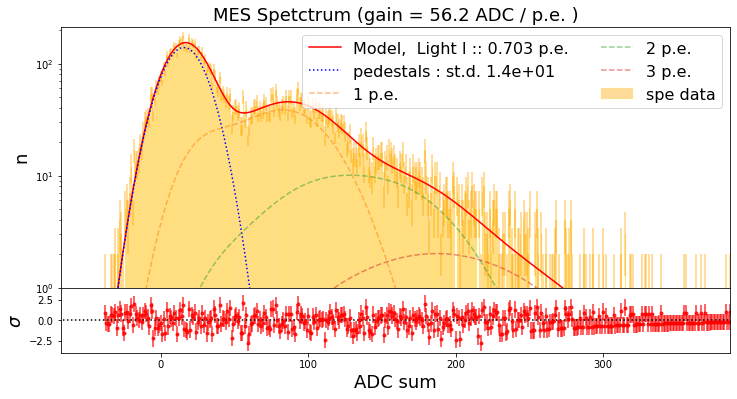

In [5]:
res_data,err,gain_data = fit_ses_2g_2(Q_array1_data,plot=True)

In [6]:
Simgains.shape

(10,)

In [7]:
ress_MC    = np.array(ress_MC)
ress_data  = np.array(ress_data)
gains_MC   = np.array(gains_MC)
gains_data = np.array(gains_data)

sim_gains = np.array(sim_gains)

In [8]:
ress_data.mean(axis=0)

array([6.50675495e-01, 3.98884815e+03, 1.43942908e+01, 4.98454278e-01,
       7.00771020e+01])

Text(0.5, 0, 'ADC sum')

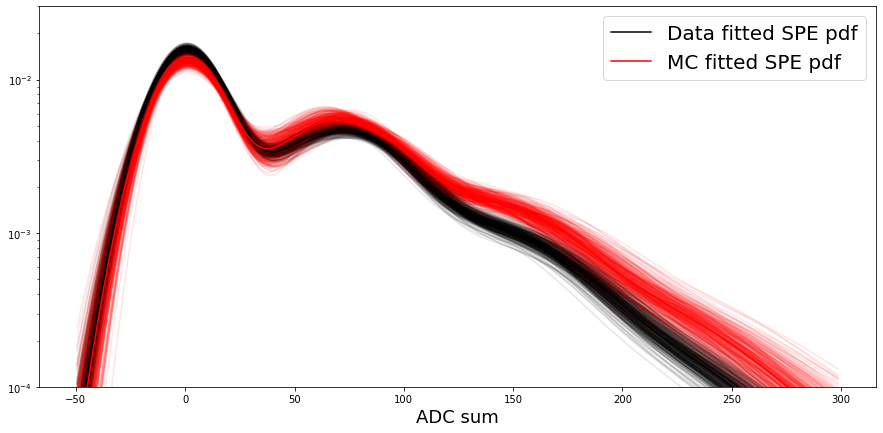

In [23]:
bins = np.arange(-50,300,1)
xx = (bins[1:]+bins[:-1])/2
#h = plt.hist(Q_array1_MC-res_MC[1],  bins=bins,color='red',    alpha=.3, density=1,label='MC')
##h = plt.hist(Q_array1_data-res_data[1],bins=bins,color='black',alpha=.3, density=1,label='data')


for ii in range(len(ress_data)):
    
    p = plt.plot(xx,mes2g(xx,ress_data[ii,0],0,ress_data[ii,2],ress_data[ii,3],ress_data[ii,4]),color='black',alpha=.1)
    p = plt.plot(xx,mes2g(xx,ress_MC[ii,0],0,ress_MC[ii,2],ress_MC[ii,3],ress_MC[ii,4]),color='red',alpha=.1)

p = plt.plot(xx,mes2g(xx,ress_data[:,0].mean(axis=0), \
                          0,ress_data[:,2].mean(axis=0), \
                          ress_data[:,3].mean(axis=0), \
                          ress_data[:,4].mean(axis=0)),color='black',alpha=1,\
                          label='Data fitted SPE pdf')
p = plt.plot(xx,mes2g(xx,ress_MC[:,0].mean(axis=0), \
                          0,ress_MC[:,2].mean(axis=0), \
                          ress_MC[:,3].mean(axis=0), \
                          ress_MC[:,4].mean(axis=0)),color='red',alpha=1,\
                          label='MC fitted SPE pdf')

ax = plt.gca()
ax.set_ylim(1e-4,3e-2)
ax.set_yscale('log')
ax.legend(prop={'size':20})
ax.set_xlabel('ADC sum',fontsize=18)

Text(0.5, 0, 'ADC sum')

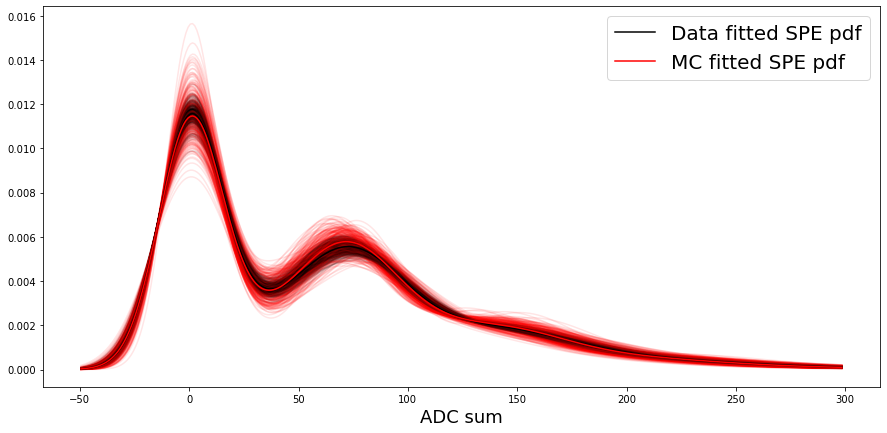

In [27]:
for ii in range(293):
    p = plt.plot(xx,mes2g(xx,1,0,ress_data[ii,2],ress_data[ii,3],ress_data[ii,4]),color='black',alpha=.1)
    p = plt.plot(xx,mes2g(xx,1,0,ress_MC[ii,2],ress_MC[ii,3],ress_MC[ii,4]),color='red',alpha=.1)
    
p = plt.plot(xx,mes2g(xx,1, \
                          0,ress_data[:,2].mean(axis=0), \
                          ress_data[:,3].mean(axis=0), \
                          ress_data[:,4].mean(axis=0)),color='black',alpha=1,\
                          label='Data fitted SPE pdf')
p = plt.plot(xx,mes2g(xx,1, \
                          0,ress_MC[:,2].mean(axis=0), \
                          ress_MC[:,3].mean(axis=0), \
                          ress_MC[:,4].mean(axis=0)),color='red',alpha=1,\
                          label='MC fitted SPE pdf')
ax = plt.gca()

ax.legend(prop={'size':20})
ax.set_xlabel('ADC sum',fontsize=18)


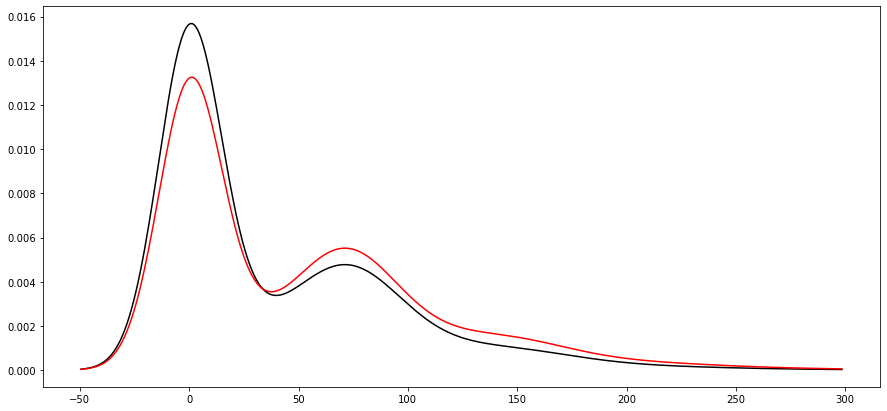

In [25]:
p = plt.plot(xx,mes2g(xx,ress_data[:,0].mean(axis=0), \
                          0,ress_data[:,2].mean(axis=0), \
                          ress_data[:,3].mean(axis=0), \
                          ress_data[:,4].mean(axis=0)),color='black',alpha=1,\
                          label='Data fitted SPE pdf')
p = plt.plot(xx,mes2g(xx,ress_MC[:,0].mean(axis=0), \
                          0,ress_MC[:,2].mean(axis=0), \
                          ress_MC[:,3].mean(axis=0), \
                          ress_MC[:,4].mean(axis=0)),color='red',alpha=1,\
                          label='MC fitted SPE pdf')

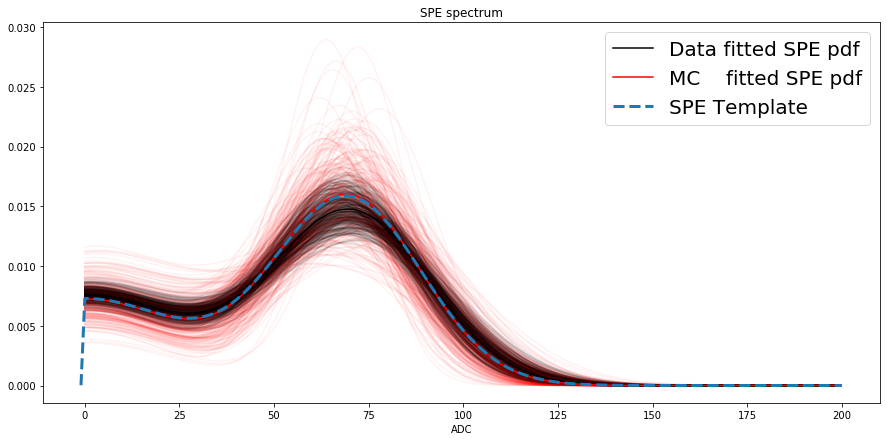

In [11]:

    
#fff ='/local/home/ttaverni/cta-nectar/NectarCamPyUaf/cta/MyNectar/scripts/Nectarpipe_2.0/spe_afterpulse_pdf_NectarCam_14032019.dat'
#from astropy.io import ascii
#aaa = ascii.read(fff)
#plt.plot(aaa['col1'][:300]*58.,aaa['col3'][:300]/58.)

xxx = np.linspace(-1,200,202)
x2 = np.linspace(-1,200,202)

##Fixed param
pp  = 0.45
nn  = 0.715

xxx = np.arange(0,200,1)
for ii in range(len(ress_data)):
    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[ii,3],ress_data[ii,4],nn),color='black',alpha=.1)
    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[ii,3],ress_MC[ii,4],nn),color='red',alpha=.05)

mu2 = 69.4
res = 0.48

p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[:,3].mean(axis=0),ress_data[:,4].mean(axis=0),nn),color='black',alpha=1,\
             label='Data fitted SPE pdf')
p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[:,3].mean(axis=0),ress_MC[:,4].mean(axis=0),nn),color='red',alpha=1,\
            label='MC    fitted SPE pdf')

spe = doubleGaussConstrained(x2,pp,res,mu2,nn)
plt.plot(x2,spe,'--',lw=3.,label='SPE Template')
gain = np.sum(x2*doubleGaussConstrained(x2,pp,res,mu2,nn))
plt.gca().set_title('SPE spectrum')
plt.gca().set_xlabel('ADC')
plt.gca().legend(prop={'size': 20})

Text(0.5, 1.0, 'Gain estimation')

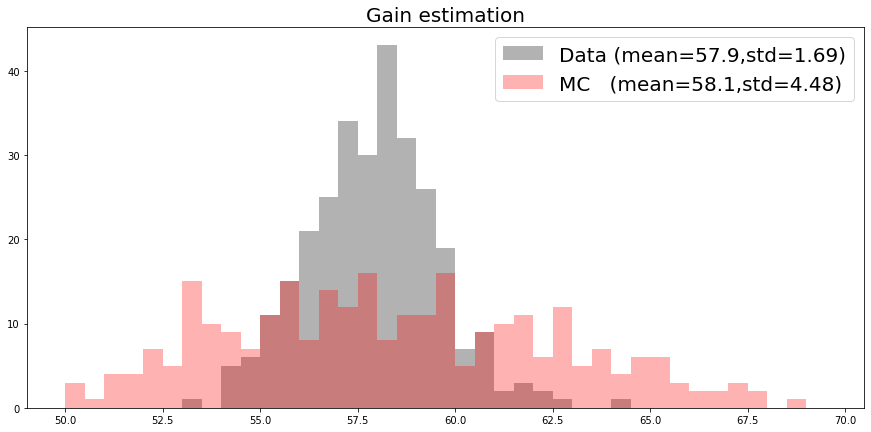

In [12]:
plt.hist(gains_data,bins=np.arange(50,70,.5),color='black',alpha=.3,\
         label='Data (mean={:.3},std={:.3})'.format(gains_data.mean(),gains_data.std()))
plt.hist(gains_MC,bins=np.arange(50,70,.5),color='red',alpha=.3,\
         label='MC   (mean={:.3},std={:.3})'.format(gains_MC.mean(),gains_MC.std()))
plt.gca().legend(prop={'size':20})

plt.gca().set_title('Gain estimation',fontsize=20)


In [13]:
gains_data.argmin()


39

In [14]:
58.*dc_to_pe.mean()

15.559982419013977

0.06239818125760306


Text(0.5, 1.0, 'Fitted Gain / simulated Gain')

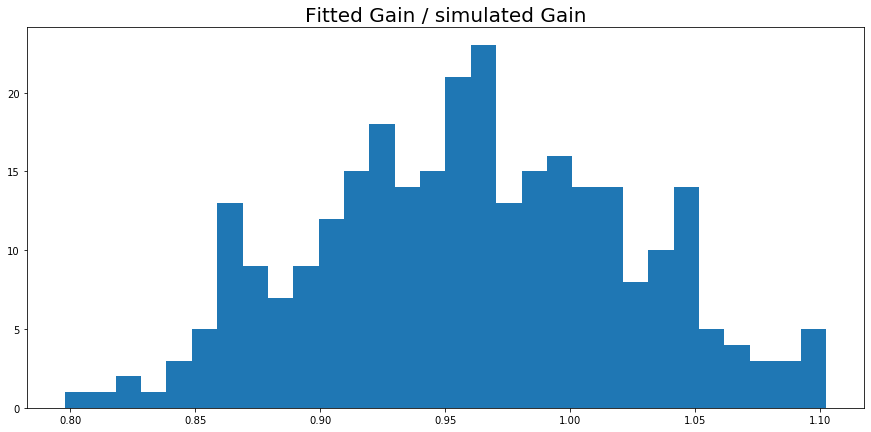

In [15]:
h=plt.hist(gains_MC/sim_gains,30)


print((gains_MC/sim_gains).std())
           
plt.gca().set_title("Fitted Gain / simulated Gain",fontsize=20)